In [13]:
# !pip install spacy

In [14]:
%pwd

'c:\\Projects\\tweetAnalysisRandomForest\\Notebooks'

In [15]:
import os
os.chdir('../')

In [16]:
%pwd

'c:\\Projects\\tweetAnalysisRandomForest'

In [17]:
import pandas as pd
df=pd.read_csv("data/twitter_sentiment.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   75681 non-null  int64 
 1   Borderlands                                            75681 non-null  object
 2   Positive                                               75681 non-null  object
 3   im getting on borderlands and i will murder you all ,  74995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df.isna().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [21]:
df=pd.read_csv("data/twitter_sentiment.csv",header=None,index_col=0)
df

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...


In [22]:
df.columns
df.columns=['index',"sentiments",'text']
print(df.columns)

Index(['index', 'sentiments', 'text'], dtype='object')


In [23]:
selected_columns = [1, 2]
df = df.iloc[:, selected_columns]

In [24]:
df

,sentiments,text
0,,
2401,Positive,im getting on borderlands and i will murder yo...
2401,Positive,I am coming to the borders and I will kill you...
2401,Positive,im getting on borderlands and i will kill you ...
2401,Positive,im coming on borderlands and i will murder you...
2401,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
4891,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
4359,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
2652,Positive,Today sucked so it’s time to drink wine n play...


In [25]:
df=df.reset_index()
print(df.columns)


Index([0, 'sentiments', 'text'], dtype='object')


In [26]:
df=df.drop(columns=0)

In [27]:
df.head(3)

,sentiments,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiments  75682 non-null  object
 1   text        74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [29]:
df.isna().sum()
df.dropna(inplace=True)
# df=df[df['text'].apply(len(text)>=5)]

In [30]:
df

,sentiments,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [31]:
sum(df['text'].apply(len)>5)

72883

In [32]:
df=df[df['text'].apply(len)>5]

In [33]:
df

,sentiments,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [34]:
df['sentiments'].value_counts()

Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: sentiments, dtype: int64

In [43]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

# Get the stopwords for English
english_stopwords = set(stopwords.words('english'))
stopwords=english_stopwords

[nltk_data] Downloading package stopwords to C:\Users\ALOK
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
import regex as re

def _get_wordcounts(x):
	length = len(str(x).split())
	return length

def _get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)

def _get_avg_wordlength(x):
	count = _get_charcounts(x)/_get_wordcounts(x)
	return count

def _get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l

def _get_hashtag_counts(x):
	l = len([t for t in x.split() if t.startswith('#')])
	return l

def _get_mentions_counts(x):
	l = len([t for t in x.split() if t.startswith('@')])
	return l

def _get_digit_counts(x):
	digits = re.findall(r'[0-9,.]+', x)
	return len(digits)

def _get_uppercase_counts(x):
	return len([t for t in x.split() if t.isupper()])




def _get_basic_features(df):
	if type(df) == pd.core.frame.DataFrame:
		df['char_counts'] = df['text'].apply(lambda x: _get_charcounts(x))
		df['word_counts'] = df['text'].apply(lambda x: _get_wordcounts(x))
		df['avg_wordlength'] = df['text'].apply(lambda x: _get_avg_wordlength(x))
		df['stopwords_counts'] = df['text'].apply(lambda x: _get_stopwords_counts(x))
		df['hashtag_counts'] = df['text'].apply(lambda x: _get_hashtag_counts(x))
		df['mentions_counts'] = df['text'].apply(lambda x: _get_mentions_counts(x))
		df['digits_counts'] = df['text'].apply(lambda x: _get_digit_counts(x))
		df['uppercase_counts'] = df['text'].apply(lambda x: _get_uppercase_counts(x))
	else:
		print('ERROR: This function takes only Pandas DataFrame')
		
	return df

In [45]:
_get_basic_features(df)

,sentiments,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,235,47,5.000000,19,0,0,6,1
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,202,46,4.391304,13,0,0,4,10
75679,Positive,Today sucked so it’s time to drink wine n play...,97,24,4.041667,9,0,0,1,1
75680,Positive,Bought a fraction of Microsoft today. Small wins.,42,8,5.250000,2,0,0,2,0


In [57]:
# !pip install BeautifulSoup

In [58]:
df.columns

Index(['sentiments', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [59]:
# !pip install seaborn

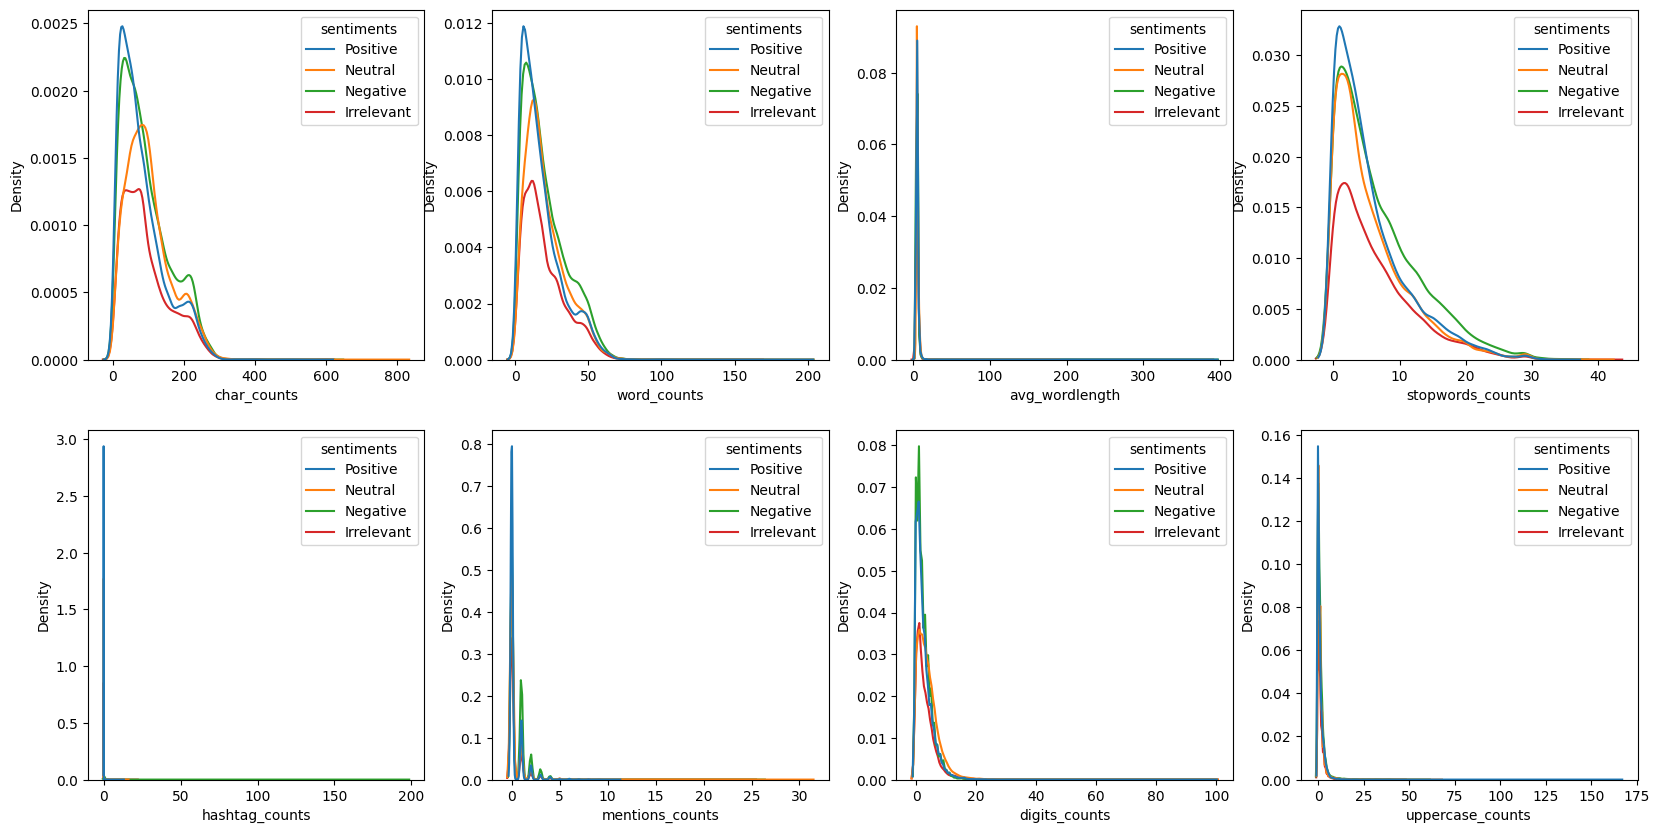

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
num_col=df.select_dtypes(include='number').columns
import seaborn as sns
for index,col in enumerate(num_col):
    plt.subplot(2,4,index+1)
    sns.kdeplot(data=df,x=col,hue='sentiments')

<Axes: ylabel='sentiments'>

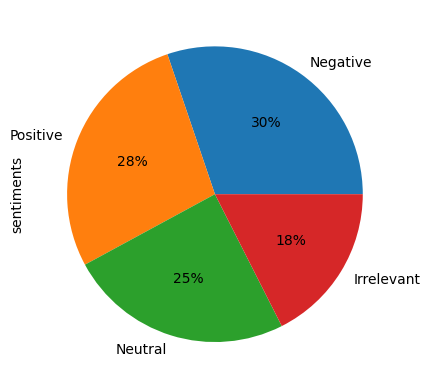

In [62]:
df['sentiments'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [63]:
## wordclouds
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS
              )
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [64]:
wordcloud=WordCloud(background_color='white',max_font_size=40,max_words=250,stopwords=stopwords).generate(str(df['text']))

In [68]:
print(str(df['text']).count("borderlands"))

4


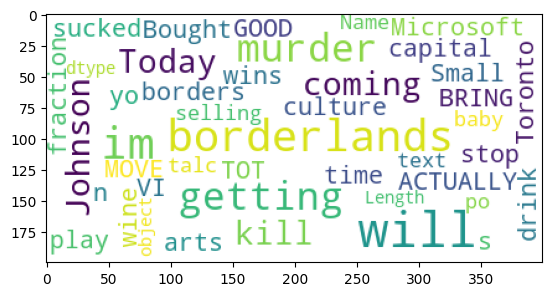

In [65]:
plt.imshow(wordcloud)

In [69]:

import unicodedata
from bs4 import BeautifulSoup
def _get_emails(x):
	emails = re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x)
	counts = len(emails)

	return counts, emails


def _remove_emails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)



def _remove_html_tags(x):
	return BeautifulSoup(x, 'lxml').get_text().strip()

def _remove_accented_chars(x):
	x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
	return x

def _get_urls(x):
	urls = re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)
	counts = len(urls)

	return counts, urls

def _remove_urls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def _remove_rt(x):
	return re.sub(r'\brt\b', '', x).strip()

def _remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x


In [75]:
!pip install lxml


  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/31/58/e3b3dd6bb2ab7404f1f4992e2d0e6926ed40cef8ce1b3bbefd95877499e1/lxml-4.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 991.0 kB/s eta 0:00:04
    --------------------------------------- 0.1/3.8 MB 563.7 kB/s eta 0:00:07
   - -------------------------------------- 0.1/3.8 MB 819.2 kB/s eta 0:00:05
   - -------------------------------------- 0.1/3.8 MB 554.9 kB/s eta 0:00:07
   -- ------------------------------------- 0.2/3.8 MB 731.4 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/3.8 MB 801.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.3/3.8 MB 741.6 kB/s eta 0:00:05
   --- ------------------------------------ 0.4/3.8 MB 857.5 kB/s eta 0:00:04
   ---- ----------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:

import unicodedata
from bs4 import BeautifulSoup
import lxml

from lxml import html

def remove_html_tags(html_string):
    # Parse the HTML string
    tree = html.fromstring(html_string)

    # Serialize the parsed tree back to a string without tags
    text_content = tree.text_content()

    return text_content

def _get_emails(x):
	emails = re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x)
	counts = len(emails)

	return counts, emails


def _remove_emails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)





def _remove_accented_chars(x):
	x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
	return x

def _get_urls(x):
	urls = re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)
	counts = len(urls)

	return counts, urls

def _remove_urls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def _remove_rt(x):
	return re.sub(r'\brt\b', '', x).strip()

def _remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x


df['text']=df['text'].apply(lambda x: x.lower())
df['text']=df['text'].apply(lambda x: _remove_urls(x))
df['text']=df['text'].apply(lambda x: _remove_emails(x))
df['text']=df['text'].apply(lambda x: remove_html_tags(x))
df['text']=df['text'].apply(lambda x: _remove_rt(x))
df['text']=df['text'].apply(lambda x: _remove_special_chars(x))



In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['text'],
df['sentiments'],test_size=0.2,random_state=42)

In [84]:
X_train.shape,X_test.shape

((58306,), (14577,))

In [92]:
stopwords=[stopwords]
print(type(stopwords))

<class 'list'>


# model

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf=Pipeline([('tfid',TfidfVectorizer()),('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [96]:
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

  Irrelevant       0.85      0.98      0.91      2179
    Negative       0.96      0.92      0.94      4635
     Neutral       0.92      0.92      0.92      3609
    Positive       0.94      0.91      0.93      4154

    accuracy                           0.93     14577
   macro avg       0.92      0.93      0.92     14577
weighted avg       0.93      0.93      0.93     14577



In [100]:
import pickle
pickle.dump(clf,open('twitter_sentiment.pkl','wb'))

In [103]:
clf.predict(['I am happy but more sad'])

array(['Negative'], dtype=object)

In [106]:
clf.predict(['I am happy and no more sad now but missing her '])

array(['Positive'], dtype=object)